# **The Wheat Seeds Dataset**

**Overview**

The Wheat Seeds Dataset involves the prediction of species given measurements of seeds from different varieties of wheat.

It is a binary (2-class) classification problem. 
The number of observations for each class is balanced. 
There are 210 observations with 7 input variables and 1 output variable. 
The variable names are as follows:

- Area.
- Perimeter.
- Compactness
- Length of kernel.
- Width of kernel.
- Asymmetry coefficient.
- Length of kernel groove.
- Target (Kama: 1, Rosa: 2, Canadian: 3)

**Notes: Please make a copy before start working**

**Import tools set**

In [0]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

**Read 08_seeds.csv as a dataframe called se**

In [0]:
# github link: 'https://raw.githubusercontent.com/dhuy237/Wheat-Seeds/master/08_seeds.csv'
# google drive: 'https://drive.google.com/file/d/1113DaNnvaT1GKkC-26KufoldZ2J9cn78/view'
url = 'https://raw.githubusercontent.com/dhuy237/Wheat-Seeds/master/08_seeds.csv'
se = pd.read_csv(url)

## Checking the data

**Check the head of the DataFrame**

In [56]:
se.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


**Let's see our data's information**

In [57]:
se.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
Area               199 non-null float64
Perimeter          199 non-null float64
Compactness        199 non-null float64
Kernel.Length      199 non-null float64
Kernel.Width       199 non-null float64
Asymmetry.Coeff    199 non-null float64
Kernel.Groove      199 non-null float64
Type               199 non-null int64
dtypes: float64(7), int64(1)
memory usage: 12.5 KB


**We will have a look at my data features' statistics**

In [58]:
se.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


**Type 1's features**

In [59]:
se[se['Type'] == 1].describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.0
mean,14.354394,14.306818,0.879892,5.513000,3.247485,2.690670,5.087197,1.0
std,1.178117,0.559209,0.016349,0.228527,0.173251,1.198981,0.259822,0.0
min,11.230000,12.630000,0.839200,4.902000,2.879000,0.765100,4.519000,1.0
25%,13.750000,13.960000,0.868850,5.384500,3.134250,1.826500,4.924500,1.0
50%,14.360000,14.320000,0.880500,5.534000,3.243500,2.545500,5.094000,1.0
75%,15.045000,14.732500,0.888225,5.677000,3.378500,3.361750,5.221500,1.0
max,17.080000,15.460000,0.918300,6.053000,3.683000,6.685000,5.877000,1.0


**Type 2's features**

In [60]:
se[se['Type'] == 2].describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0
mean,18.370147,16.156912,0.882965,6.157838,3.678647,3.657250,6.026515,2.0
std,1.413670,0.599224,0.015371,0.259336,0.185824,1.195293,0.246663,0.0
min,15.380000,14.890000,0.845200,5.363000,3.231000,1.472000,5.144000,2.0
25%,17.350000,15.752500,0.872075,5.979750,3.558750,2.849000,5.878500,2.0
50%,18.720000,16.225000,0.882300,6.149000,3.693500,3.629000,5.981500,2.0
75%,19.142500,16.575000,0.897100,6.321500,3.803250,4.453750,6.187250,2.0
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,2.0


**Type 3's feature**

In [61]:
se[se['Type'] == 3].describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0
mean,11.881077,13.256154,0.848874,5.236862,2.851677,4.767185,5.125415,3.0
std,0.720822,0.347975,0.020807,0.136917,0.143343,1.237093,0.160033,0.0
min,10.590000,12.410000,0.808100,4.899000,2.630000,1.661000,4.794000,3.0
25%,11.270000,13.020000,0.833500,5.140000,2.745000,4.051000,5.003000,3.0
50%,11.840000,13.270000,0.849600,5.236000,2.836000,4.853000,5.132000,3.0
75%,12.380000,13.470000,0.861300,5.333000,2.967000,5.462000,5.263000,3.0
max,13.370000,13.950000,0.896400,5.541000,3.232000,8.315000,5.491000,3.0


## Cleaning the data

**Rename data field**

In [0]:
se.rename(columns={"Area": "A", "Perimeter": "P", "Compactness": "C", "Kernel.Length": "K.L", "Kernel.Width": "K.W", "Asymmetry.Coeff": "A.C", "Kernel.Groove": "K.G"}, inplace=True)

**Check for NaN values**

In [63]:
se.isnull().sum()

A       0
P       0
C       0
K.L     0
K.W     0
A.C     0
K.G     0
Type    0
dtype: int64

**Check the outliers using boxplot**

**Visualize Area**

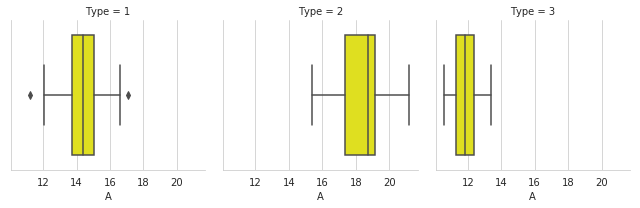

In [64]:
a = sns.FacetGrid(se, col='Type')
a.map(sns.boxplot, 'A', color='yellow', order=['1', '2', '3'])

**Visualize Perimeter**

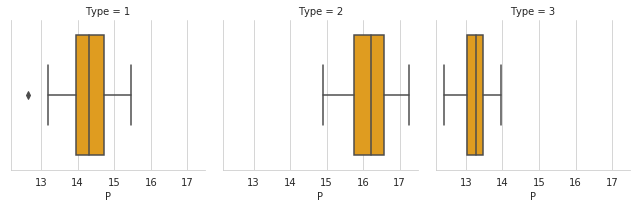

In [65]:
p = sns.FacetGrid(se, col='Type')
p.map(sns.boxplot, 'P', color='orange', order=['1', '2', '3'])

**Visualize Compactness**

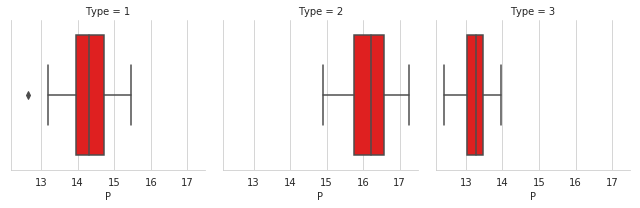

In [66]:
c = sns.FacetGrid(se, col='Type')
c.map(sns.boxplot, 'P', color='red', order=['1', '2', '3'])

**Visualize Length of Kernel**

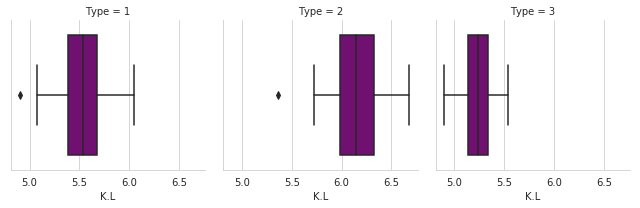

In [67]:
kl = sns.FacetGrid(se, col='Type')
kl.map(sns.boxplot, 'K.L', color='purple', order=['1', '2', '3'])

**Visualize Width of Kernel**

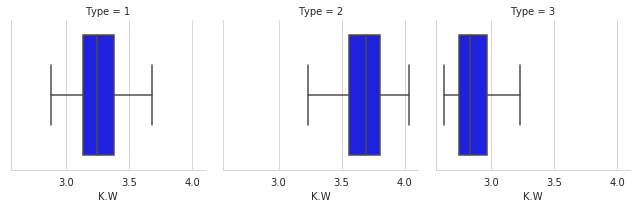

In [68]:
kw = sns.FacetGrid(se, col='Type')
kw.map(sns.boxplot, 'K.W', color='blue', order=['1', '2', '3'])

**Visualize Asymmetry coefficient**

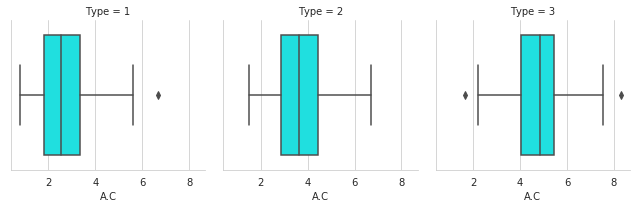

In [69]:
ac = sns.FacetGrid(se, col='Type')
ac.map(sns.boxplot, 'A.C', color='cyan', order=['1', '2', '3'])

**Visualize Length of Kernel Groove**

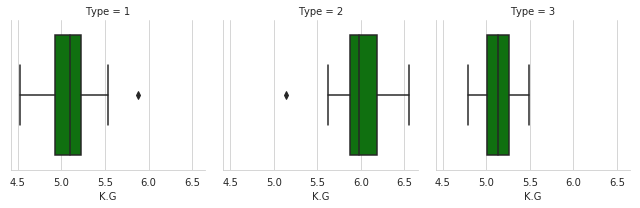

In [70]:
kg = sns.FacetGrid(se, col='Type')
kg.map(sns.boxplot, 'K.G', color='green', order=['1', '2', '3'])

We decided to not clean the outliers because we don't know that the outliers from those parameters is measured good or not. In other words, during the measurment process, these number is error or not.


And in some researchs, the outliers may raise up a new feature so we don't handle it.

**Check unique values**

In [71]:
se.nunique()

A       186
P       163
C       177
K.L     179
K.W     177
A.C     197
K.G     142
Type      3
dtype: int64

**Check duplicate rows**

In [72]:
se_row = se[se.duplicated()]
se_row

,A,P,C,K.L,K.W,A.C,K.G,Type


## EDA

The last column is reserved for the Kernel type. This particular dataset has 199 entries. Some of these variables are explicitly dependent. 

Compactness: C = 4\*pi\*Area/(Perimeter)^2 has a linear proportional relationship with area, and also a square proportionality with kernel perimeter.

**Correlations between the features using heatmap**

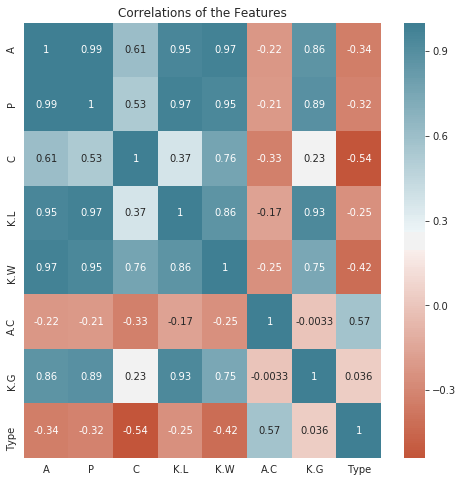

In [73]:
plt.figure(figsize=[8,8])
sns.heatmap(se.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200))
plt.title('Correlations of the Features')
plt.show()

**How many target classes we have in our data?**

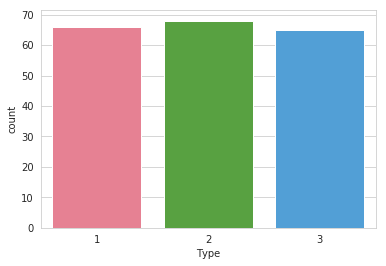

In [74]:
sns.countplot(se['Type'], palette='husl')
plt.show()

**Visualize all the features using a pairplot**

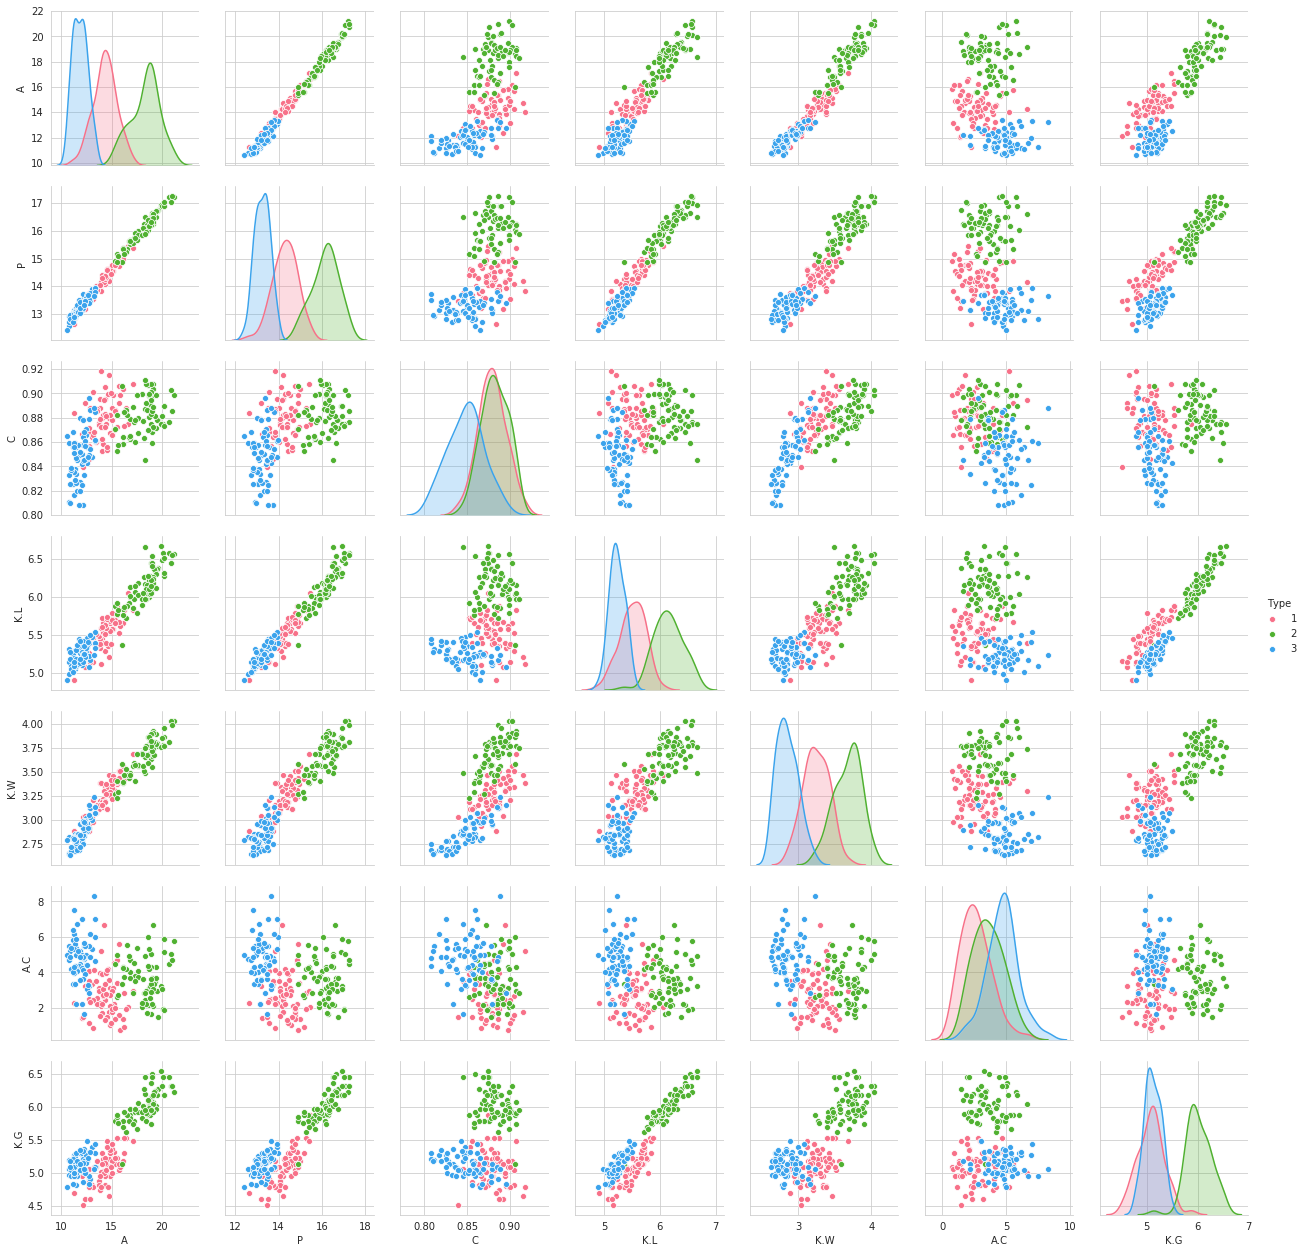

In [75]:
item = sns.pairplot(se, vars = ['A', 'P', 'C', 'K.L', 'K.W', 'A.C', 'K.G'] ,hue='Type', palette='husl')
plt.show()

## Conclusion


* Kama (Type 1) variety has the smallest AC values, meaning that its shape is more spherical than the other groups. This is supported by the fact that the Kama group has the smallest difference between the average length (L) and width (W) values among the three varieties.
* Rosa (Type 2) is the largest type of wheat kernel, and the Canadian variety is the smallest while Kama is intermediate, making it difficult to distinguish.
* Canadian (Type 3) group can also be distinguished by its low average C value whereas Rosa and Kama kernels have higher and very similar C values.




